In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The dataset includes the features like type of payment, Old balance, amount paid, name of the destination, etc.

In [6]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


To print the information of the data we can use data.info() command.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165439 entries, 0 to 165438
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            165439 non-null  int64  
 1   type            165439 non-null  object 
 2   amount          165439 non-null  float64
 3   nameOrig        165439 non-null  object 
 4   oldbalanceOrg   165439 non-null  float64
 5   newbalanceOrig  165439 non-null  float64
 6   nameDest        165439 non-null  object 
 7   oldbalanceDest  165438 non-null  float64
 8   newbalanceDest  165438 non-null  float64
 9   isFraud         165438 non-null  float64
 10  isFlaggedFraud  165438 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.9+ MB


Let's see the mean, count, minimum and maximum values of the data.

In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,165439.000000,1.654390e+05,1.654390e+05,1.654390e+05,1.654380e+05,1.654380e+05,165438.000000,165438.0
mean,9.553715,1.793496e+05,8.862403e+05,9.031748e+05,9.229948e+05,1.185652e+06,0.000804,0.0
std,1.967747,3.360318e+05,2.812176e+06,2.848990e+06,2.380862e+06,2.690358e+06,0.028342,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.141030e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.376490e+04,1.951200e+04,0.000000e+00,3.956590e+04,1.070278e+05,0.000000,0.0
75%,11.000000,2.248438e+05,1.901025e+05,2.227964e+05,7.106599e+05,1.144234e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.894623e+07,3.904248e+07,1.000000,0.0


# Data Visualization

In this section, we will try to understand and compare all columns.
Let's count the columns with different datatypes like Category, Integer, Float.

In [10]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


Let's see the count plot of the Payment type column using Seaborn library.

<ipython-input-14-4af35b88e5e8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette=colors)


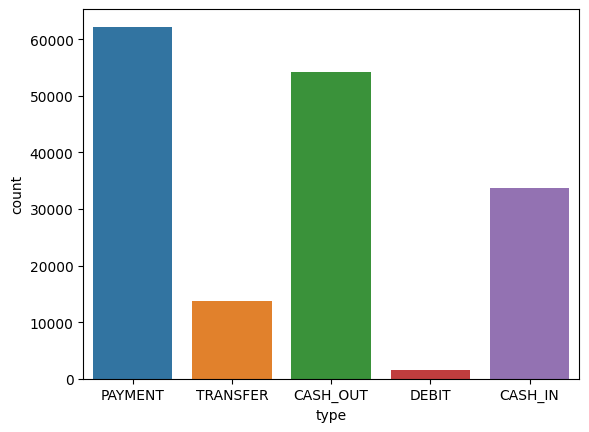

In [14]:
# Define the colors you want to use
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Create the count plot with the specified colors
sns.countplot(x='type', data=data, palette=colors)

# Show the plot
plt.show()


We can aslo use the bar plot for analyzing Type and amount column simulataneously.

<ipython-input-19-d09b0f2fcebf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='amount', data=data, palette=palette)


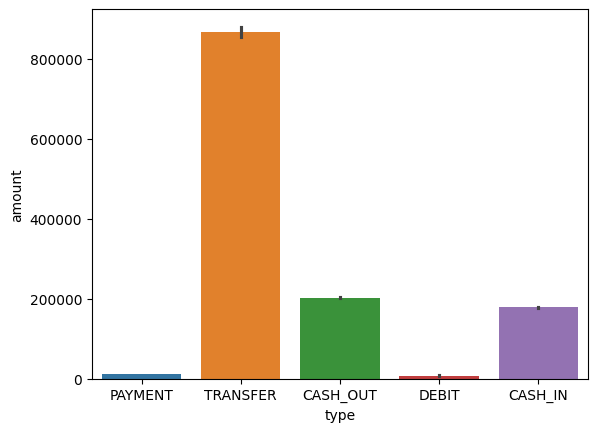

In [19]:
# Define the colors you want to use for each type
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Create a color palette with your custom colors
palette = sns.color_palette(colors)

# Create the bar plot with different colors
sns.barplot(x='type', y='amount', data=data, palette=palette)

# Show the plot
plt.show()


Both the graph clearly shows that mostly the type chas_out and transfer are maximum in count and as well as in amount.
Let's check the distribution of data among both the prediction values.

In [20]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,165305
1.0,133


The dataset is already in same count.so there is no need of sampling.
Now let's see the distribution of the step column using distplot.

<Figure size 1500x600 with 0 Axes>

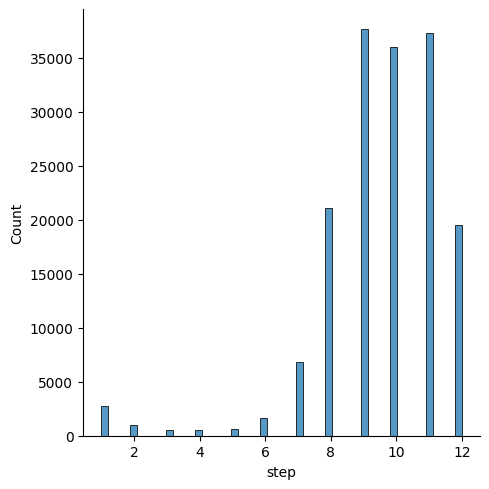

In [21]:
plt.figure(figsize=(15,6))
sns.displot(data['step'], bins=50)

The graph shows the maximum distribution among 6 to 12 of step.
Now, Let's find the correlation among different features using Heatmap.

<Axes: >

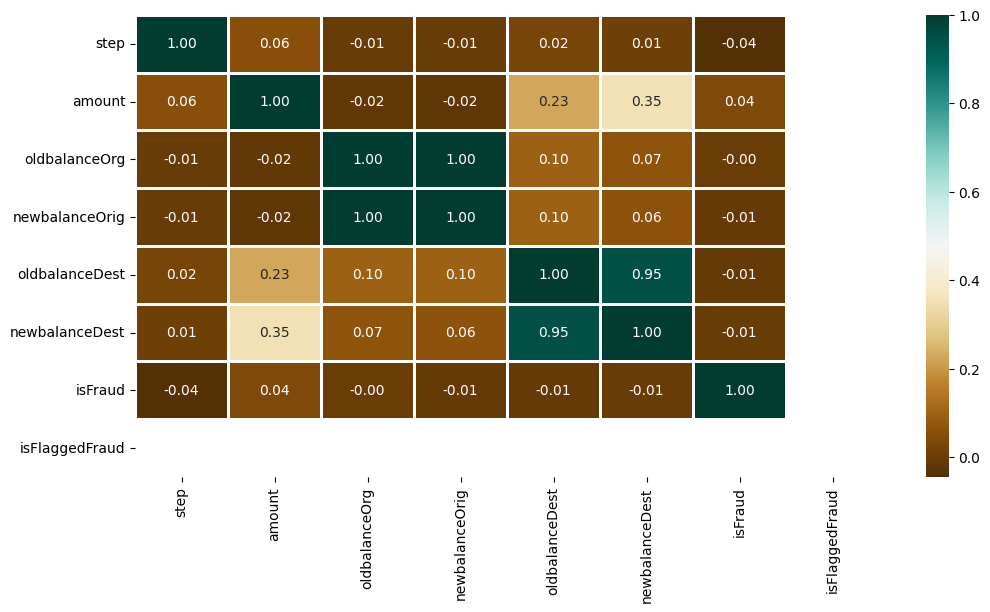

In [30]:
data_encoded = pd.get_dummies(data, columns=['type'])
# Aelect only numerical columns for correlation calculation
numerical_data = data_encoded.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numerical_data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# Data Preprocessing

This step includes the following :

1-Encoding of Type column

2-Dropping irrelevant columns like nameOrig, nameDest

3-Data Splitting

In [31]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,True,False


Once we done with the encoding, now we can drop the irrelevant columns.For that, follow the code given below.

In [32]:
x = data_new.drop(['isFraud', 'type','nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

Let's check the shape of extracted data.

In [34]:
x.shape, y.shape

((165439, 11), (165439,))

Now let's split the data into 2 parts: Training and Testing.

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training

As the prediction is a classification problem so the models we will be using are:

1- LogisticRegression : It predicts that the probability of a given data beleongs to the particular category or not.

2- XGBClassifier: It refers to Gradient Boosted decision tress. In this weights are assigned to all the independent variables which are weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.

3- SVC: SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.

4-  RandomForestClassifier: Random forest calssifier creates a set of decision tress from a randomly selected subset of the training set.
Then, it collects the votes from different decision trees to decide the final prediction.


Let's import the modules of the relevant models.

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Once done with the importing,Let's train the model.

In [43]:
import pandas as pd

models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

for i in range(len(models)):
    models[i].fit(x_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(x_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    # Impute missing values in x_test
    x_test_imputed = pd.DataFrame(imputer.fit_transform(x_test), columns=x_test.columns)

    y_preds = models[i].predict_proba(x_test_imputed)[:, 1]  # Use imputed data

    # Handle potential NaNs in y_test
    y_test_clean = y_test.dropna()  # Remove NaN values from y_test
    y_preds_clean = y_preds[~y_test.isna()]  # Select corresponding predictions

    print('Validation Accuracy : ', ras(y_test_clean, y_preds_clean))
    print()


LogisticRegression() : 
Training Accuracy :  0.9350239572273573
Validation Accuracy :  0.8888928282925187

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999999584479892
Validation Accuracy :  0.9697015832231459

SVC(probability=True) : 
Training Accuracy :  0.9

# Model Evaluation

The best-performed model is XGBClassifier. Let's plot the Confusion Matrix for the same.

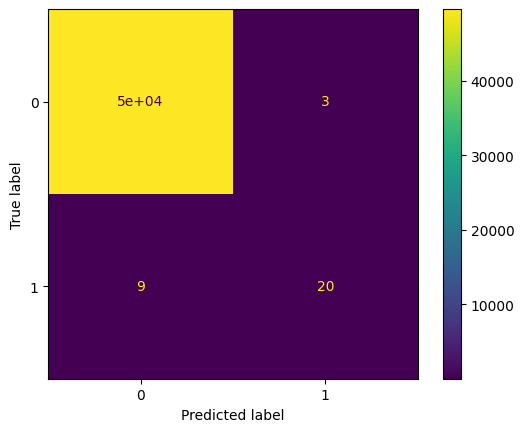

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the imputed data
y_pred = models[1].predict(x_test_imputed)

# Align predictions with non-NaN y_test values
y_pred_clean = y_pred[~y_test.isna()]

# Generate confusion matrix with aligned data
cm = confusion_matrix(y_test_clean, y_pred_clean)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=models[1].classes_)
disp.plot()
plt.show()